# Introduction 


This assignment serves as an in depth analysis of the "modified" Nicholson-Bailey model. The traditional Nicholson Bailey Model (NBM) was developed in 1935 and is a model utilized to study host-parasitoid interactions in insects. {$1$}

To understand the model, it is  crucial to make the distinction between a parasite and parasitoid. Much like a parastie, a parasitoid lives within a host, utilizing the host's body resources for its own growth and development. But contrary to a parasite, a parasitoid is an obligate killer (like a predator), ie being infected with a parasitoid guarantees the host's death. 

For example, parasitic wasps lay their eggs on/in the bodies of other insects. Once the eggs hatch, the larvae will feed on the host and this results in the death of the host insect. In this image we can see the larvae of a parasitic wasp feeding on a hornworn. 



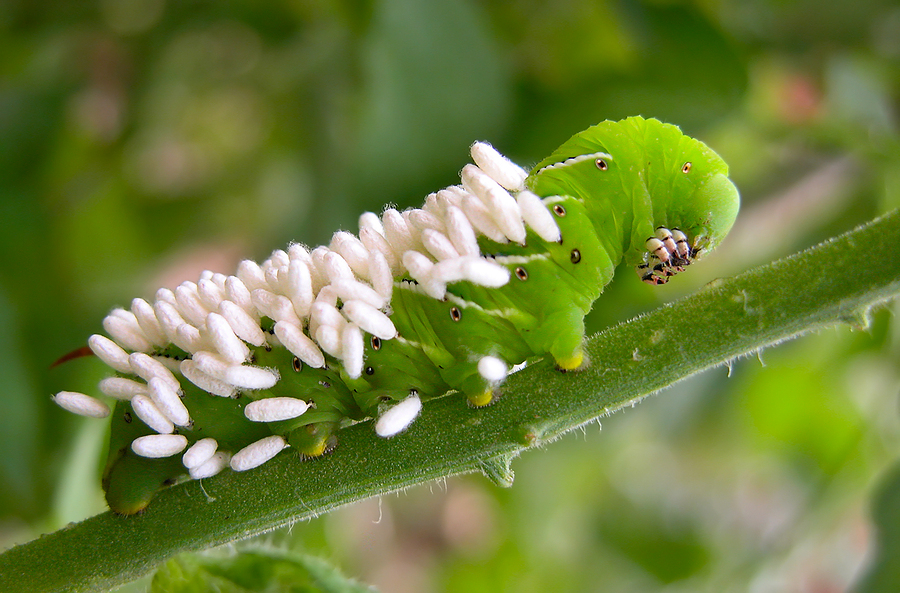
***


### Importing the subroutine 

In [2]:
# subroutine taken from Julian Mak "model.pyn"
def mod_nicolson_bailey(k, r, n=200, a=1.0):
    """
    (Modified) Nicolson-Bailey model, with non-dimensional inputs
    k    the carrying capacity
    r    some positive constant
    n    number of generations to run (optional)
    a    measure of some sort of death/survival rate (optional)
    
    Outputs the arrays "host" and "para" as a time-series in generation
    """

    host_init, para_init = k / (k-1) * np.log(k) / a, np.log(k) / a + 1e-1

    host, para = np.zeros(n), np.zeros(n)  # initializes two arrays named host and para 
    
    host[0], para[0] = host_init, para_init 
    """
    first term of host is host initial {which is the so called equilibrium condition}
    # same for parasite 
    """
    for i in range(n-1):
        host[i+1] = host[i] * np.exp(r * (1.0 - host[i] / k)) * np.exp(-a * para[i]) 
        """
        The above condition for host[i+1] seems to be differing from the traditional eqaution 
        and it must be the change as expected in the question
        """
        para[i+1] = host[i] * (1.0 - np.exp(-a * para[i])) 

    return host, para

## The Modified Nicholson Bailey Subroutine

The objective of this section is to understand the numerical construct of the model and to further understand the roles of the various components. And to finally identify any modifications which may have been made to this version of the NBM compared to the traditional version.

### Assumptions
(Required to make sense of the equations) {**2**}
1. Host and parasitoid have a single generation per year and then they die 

2. Host and Parasitoid encounters are random 

3. Population sizes in the current year depend on the population sizes of the previous year 


### The Equations
There are four governing equations of this NBM subroutine are

$H_{init} = \frac {k}{k-1} \frac {log (k)}{a}$

$ P_{init} = \frac {log (k)}{a+0.1}$

$ H_{i+1} = H_i e^{r(1-\frac{H_i}{k})} e^{-aP_{i}} $

$ P_{i+1} = H_{i} (1 - e^{-aP_{i}}) $
***
### What do these components mean?
(Lets do the more obvious ones first) 

$ H_i$  = host population density at time i 

$ P_i$ = parasitoid population density at time i 

$H_{init}$ = inital density of the host population 

$P_{init}$ = intial density of the parasitoid population 


(Now the interesting ones) 

$k$ = Is the carrying capacity of the system/environment

$a$ = Corresponds to the parasitoid searching efficiency. Or the rate at which the parasitoid can search for its host. (This can also be considered as a death/survival rate as mentioned in the subroutine.Since getting infected by a parasitoid implies death)

$r$ = Corresponds to the intrinsic growth rate. ie  the theoretical maximum rate of increase of a population per individual {**3**}


***
### Looking at each of the components of the iterative equations that govern the NBM 

#### The Insect Host

$ H_{i+1} = H_i e^{r(1-\frac{H_i}{k})} e^{-aP_{i}} $

In the density dependent version of the NBM, we can see that the host population density of a current generation  directly depends on the previous geneartion $H_i$

its growth rate given by $e^{r(1-\frac{H_i}{k})}$. 

And the probability of host !not! getting infected by the parasitoids $e^{-aP_{i}} $

#### The Parasitoid
$ P_{i+1} = H_{i} (1 - e^{-aP_{i}}) $

We can see that the population density of the parasitoid relies on the host population of the previous generation as well  $H_i$

And the probability of the parasitoid of the previous generation infecting hosts successfully $(1 - e^{-aP_{i}}) $





#### Note: Omission of Parasitoid Progeny $c$ 

In the traditional population density NBM, there is another component of the Parasitoid equation, that has been omitted from the subroutine we are going to be using. 

$ P_{t+1} = cH_{t} (1 - e^{-aP_{t}}) $ is the traditional NBM equation. {**1**}

The new factor $c$ refers to the number of parasitoid progeny being produced per infection. 



### Hypothesis

##### This is just an initial claim on what I think should happen. 

I will use an example to explain what I hypothesise what should happen according to this model. Let us take for example, a low host population initially. At this point there is not enough viable hosts for the parasitoid to infect, hence the parasitoid population is lower than the host, almost zero but not extinct. 

As the host begin to reproduce and grow (determined by their intrinsic growth rate $r$), we will see the host population rise. As the host population increases, there will be more "targets" for the parasitoid to infect. As the host population continues to increase, more and more of these hosts will get infected by the parasitoid. 

Eventually, the parasitoid will create more progeny and start killing the host. This will bring the host population back down again. Once the host population has reduced, there will once again be very few hosts for the parasitoid to infect. Therefore, bringing down the parasitoid population again. 

I expect this cyclical behaviour to continue for all 200 generations. 



### Loading the Model

figure i


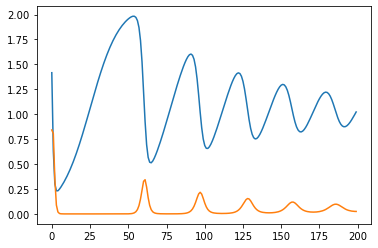

In [3]:
# Loading required libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


# This run is just to check if the subroutine is working okay.. Run provided by Dr. Julian Mak 

# modified (density dependent) Nicolson-Bailey model
k = 2.1
r = 0.1
host, para = mod_nicolson_bailey(k, r)

plt.plot(host, label="host")
plt.plot(para, label="parasite")


print("figure i")

***Trial run works okay!***

# Results

In this section, we will be exploring the parameter space ($r$, $k$). The section will be divided into two components. The first half will be keeping the carrying capacity ($k$) constant, and $r$ will be varying. In the second half the intrinsic growth rate $r$ will be constant, and the the carrying capacity will vary.


## Studying the impact of the intrinsic growth rate on the NBM 
($K$ is fixed at 2.0)


### a)  0 <$r$ < 1

figure (ii)


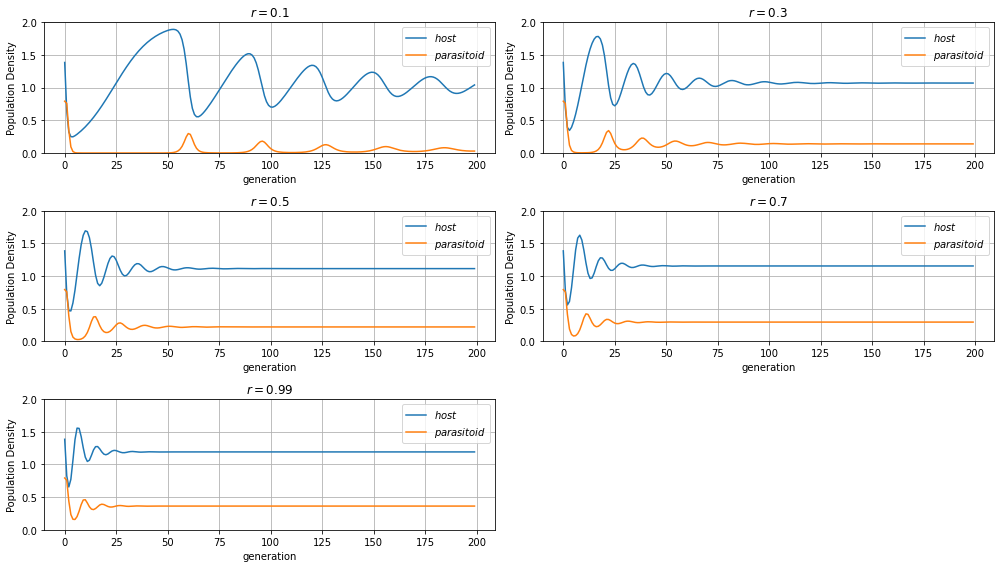

In [29]:
fig = plt.figure(figsize=(14,8))

# r = 0.1
ax = plt.subplot(3, 2, 1)
k = 2.0
r = 0.1
host,para = mod_nicolson_bailey(k, r,)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")

ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 2])
ax.set_title(f"$r = 0.1$")
ax.legend()
ax.grid()

# r = 0.3 
ax = plt.subplot(3, 2, 2)
k = 2.0
r = 0.3
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 2])
ax.set_title(f"$r = 0.3$")
ax.legend()
ax.grid()

# r = 0.5
ax = plt.subplot(3, 2, 3)
k = 2.0
r = 0.5
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 2])
ax.set_title(f"$r = 0.5$")
ax.legend()
ax.grid()


# r = 0.7
ax = plt.subplot(3, 2, 4)
k = 2.0
r = 0.7
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 2])
ax.set_title(f"$r = 0.7$")
ax.legend()
ax.grid()


# r = 0.99
ax = plt.subplot(3, 2, 5)
k = 2.0
r = 0.9
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 2])
ax.set_title(f"$r = 0.99$")
ax.legend()
ax.grid()

fig.tight_layout()
print("figure (ii)")


From this plot, we observe while there is an initial cyclical behaviour of host and parasitoid, over some generations, we can stable coexisting ecosystems. 

We can also see that there seems to be a relation between '$r$'  and the number of oscillations of the curves. As $r$ increases in value, we observe that the number of oscillations reduce, and the system is able to coexist in stable equilibirum at earlier generations. 
***
### b) 1<$r$<3.3

Figure (iii)


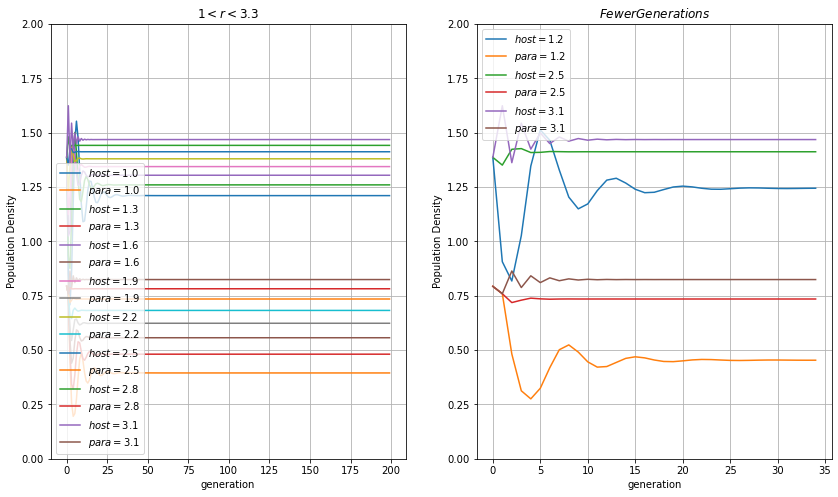

In [6]:
fig = plt.figure(figsize=(14, 8))

ax = plt.subplot(1, 2, 1)
k = 2.0

r_vec = np.arange(1,3.3,0.3) #creating random numbers between 1 and 3.3 to check my plot 
host = []
para = []
for r in r_vec:
    host,para = mod_nicolson_bailey(k,r)
    ax.plot(host, label = f"$host = {r:.1f}$" )
    ax.plot(para, label = f"$para = {r:.1f}$")

ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 2])
ax.set_title(f"$1<r<3.3$")
ax.legend()
ax.grid()

# point of this graph is too see impact of r and highlight that stability is being reached in earlier generations
ax = plt.subplot(1,2,2) 
r_vec_small = [1.2, 2.5, 3.1] # selecting random numbers which are a subset of r_vec to get a clearer graph
for r in r_vec_small:
    host,para = mod_nicolson_bailey(k,r, n = 35) # reducing the generation number, to get a better focus
    ax.plot(host, label = f"$host = {r:.1f}$")
    ax.plot(para, label = f"$para = {r:.1f}$")

ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 2])
ax.set_title(f"$Fewer Generations$")
ax.legend()
ax.grid()

print("Figure (iii)")

Graph (iii left) is  consistent with the previous case (a). As the values of $r$  are increasing there is a decrease in the number of oscillations, and the system is able to achieve stability faster. This is visible more clearly in the second graph on the right. We see $r = 1.2$ taking longer to reach stability than $r = 3.1$ 

By looking at graph (iii right ) we can see that the system is able to achieve stability within 30 generations for this generation.  


#### From cases a) and b) 
We can see that an increasing $r$, shows that the population of both parasitoid and host are able to reach stability, within fewer generations. 

***
### c) 3.4<$r$<5.5 

Figure (iv)


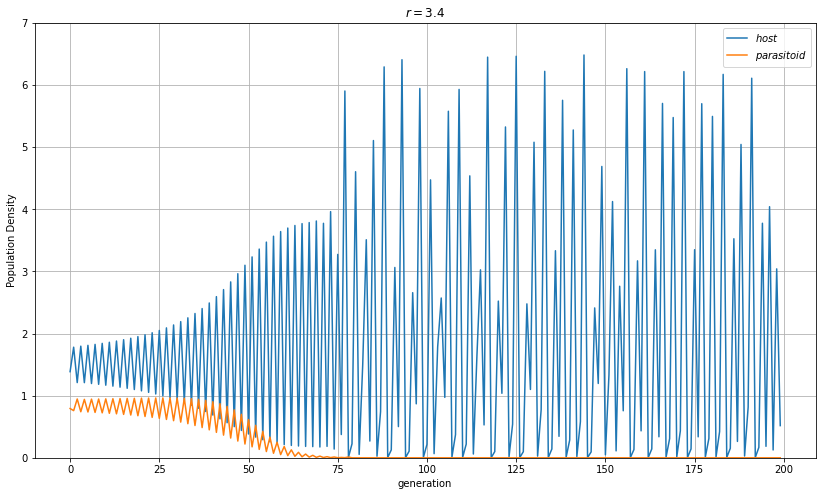

In [34]:
fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(1, 1, 1)
k = 2.0
r = 3.4
host,para = mod_nicolson_bailey(k, r, n = 200)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 7])
ax.set_title(f"$r = 3.4$")
ax.legend()
ax.grid()

print("Figure (iv)")


In this case we see a graph that is extremely different than the previously observed graphs. In this case, we are considering that the intrinsic growth rate of the host is 3.4.

Host: In this graph  we can see that the host population curve is extremley chaotic. We can see that as the host population peak is often followed immediately by a catastophic drop in the population, coming extremely close to zero.

Parasitoid: We can that there is a prominent parasitoid population prior to 70 generations. Though we can make out that there is a clear decline in the population. The parasitoid populations soon hit 0 and go extinct.

##### Possible Explanation
As the hosts have an extremely high intrinsic growth rate, their population is exceeding the carrying capacity of the environment under study $k$ which is fixed at 2.0.

The high intrinsic growth rate, means that the population of the host explodes, crossing the carrying capacity. At this point the environment cannot handle the massive host population (i.e shortage of nutrition, shelter, etc). This brings the host population crashing down. 

Once the host population plummets, there is no resource left for the parasitoid to infect, which leads to the extinction of the parasitoid. 

However, as the environment gains its resources back, the small host population is able to grow back and expand explosively again, due to the high $r$. And we can see the cycle repeat through the generations 

figure (v)


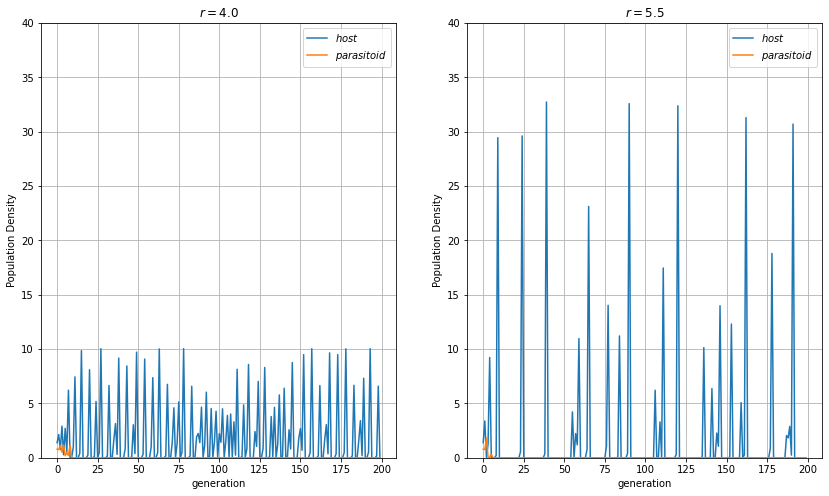

In [36]:
fig = plt.figure(figsize=(14, 8))

# r = 4
ax = plt.subplot(1, 2, 1)
k = 2.0
r = 4.0
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")

ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 40])
ax.set_title(f"$r = 4.0$")
ax.legend()
ax.grid()

# r = 5.5
ax = plt.subplot(1, 2, 2)
k = 2.0
r = 5.5
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 40])
ax.set_title(f"$r = 5.5$")
ax.legend()
ax.grid()

print("figure (v)")

The graphs above have been plotted for the sake of completeness. We look at the graphs of $r = 4.0$ and $r = 5.5$

We can see that this behaviour extends from $r = 3.4$ till $r = 5.5$.

It is noticeable that the parasitoid populations go extinct in earlier geneartions as the $r$ increases.We can also see as the $r$ increases, the max population of the host is also increasing prior to crashing. 



### d) $r$ > 5.5 

(Final case for $r$)

figure (vi)


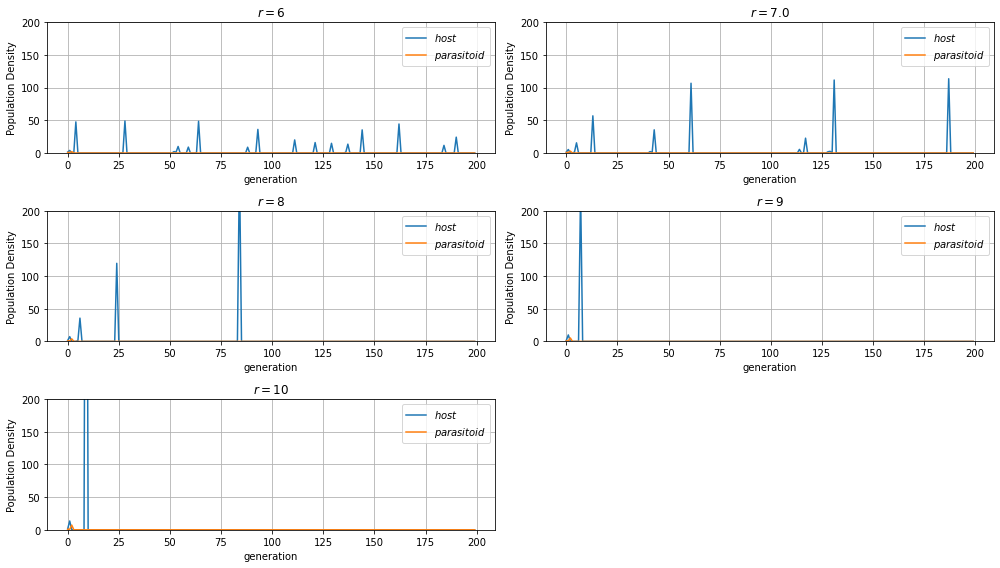

In [7]:

fig = plt.figure(figsize=(14, 8))


# r = 6
ax = plt.subplot(3, 2, 1)
k = 2.0
r = 6.0
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 200])
ax.set_title(f"$r = 6$")
ax.legend()
ax.grid()


# r = 7.0
ax = plt.subplot(3, 2, 2)
k = 2.0
r = 7.0
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 200])
ax.set_title(f"$r = 7.0$")
ax.legend()
ax.grid()


# r = 8.0
ax = plt.subplot(3, 2, 3)
k = 2.0
r = 8.0
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 200])
ax.set_title(f"$r = 8$")
ax.legend()
ax.grid()

# r = 9.0
ax = plt.subplot(3, 2, 4)
k = 2.0
r = 9.0
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 200])
ax.set_title(f"$r = 9$")
ax.legend()
ax.grid()

# r = 10
ax = plt.subplot(3, 2, 5)
k = 2.0
r = 10.0
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 200])
ax.set_title(f"$r = 10$")
ax.legend()
ax.grid()

fig.tight_layout()
print("figure (vi)")

From these graphs we can see that as the r value increases past 5.5 there is a sharp rise in the host population desnity. The intial cases $r=6$ and $r = 7$ are similar graph is similar to case (c).  

But as the value of $r$ increases further, the differences are more clear. We can clearly observe a decrease in the in the number of "cycles", ie population explosion and crashes of the host. Coming up to $r$ > 10 we can see that there is just one explosion followed by crash.

Hence we can conclude for this case, that as r increases past 5.5, there few to just one cycle of population explosion and crash. After which both host and parasitoid go extinct.

***

## Varying '$k$' ~ Carrying Capacity

#### $r$ fixed at 0.1

### e) 1< $k$ < 2

**Note:** 
$H_{init} = \frac {k}{k-1} \frac {log (k)}{a}$. 
$k$ cannot be equal to 1, as that would make the system undefined.
$k$ being less than one, also doesn't make sense, and provides the code with run time errors. 


Figure (vii)


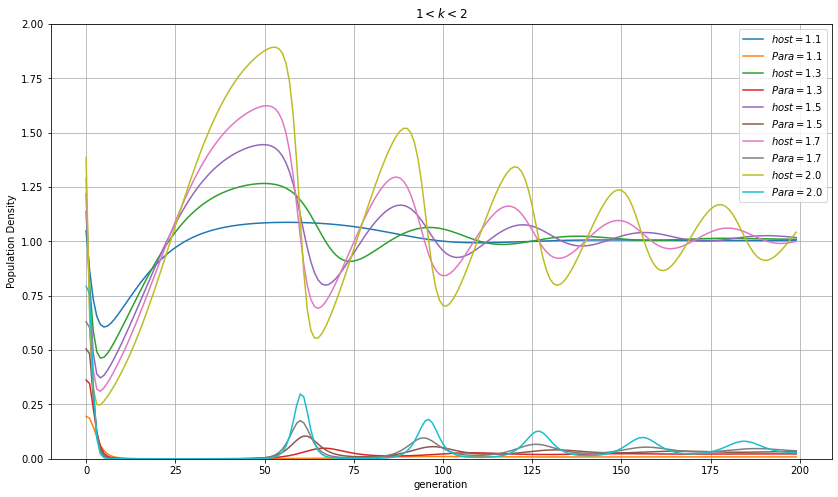

In [42]:
fig = plt.figure(figsize=(14, 8))
 

ax = plt.subplot(1, 1, 1)
k_vec = (1.1,1.3,1.5,1.7,2.0)
r = 0.1

for k in k_vec:
    host,para = mod_nicolson_bailey(k,r)
    ax.plot(host, label = f"$host = {k:.1f}$")
    ax.plot(para, label = f"$Para = {k:.1f}$")
        #f"$x_0 = {x0*100:.1f}\%$"
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 2])
ax.set_title(f"$1<k<2$")
ax.legend()
ax.grid()

print("Figure (vii)")




Figure (viii)


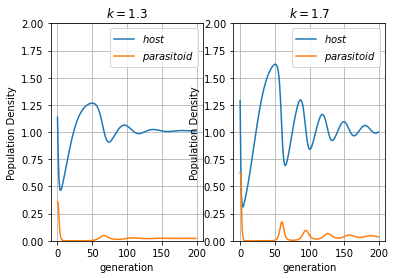

In [43]:

ax = plt.subplot(1, 2, 1)
k = 1.3
r = 0.1
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")

ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 2])
ax.set_title(f"$k = 1.3$")
ax.legend()
ax.grid()



ax = plt.subplot(1, 2, 2)
k = 1.7
r = 0.1
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")

ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 2])
ax.set_title(f"$k = 1.7$")
ax.legend()
ax.grid()

print("Figure (viii)")

In figure (vii), we can observe 2 distinct behaviours.

We can see the lower values of $k$ between 1.1 ~1.3 produce fewer oscillations in the host and parasitoid population. And the amplitude of the population itself is visibly lower. I.e they seems to reach equilibrium relatively quickly (ie in fewer generations). 

And if we look at the higher k values, ie > 1.5 we start observing an increase in the amplitude if both host and parasitoid curves. It can also be noted the system doesn't reach equilibrium within 200 generations.

The increase in amplitude can be explained by the increase in the carrying capacity of the environment. The environmnet in this case is able to support more population density.

###  f) 2<$k$<4

figure (ix)


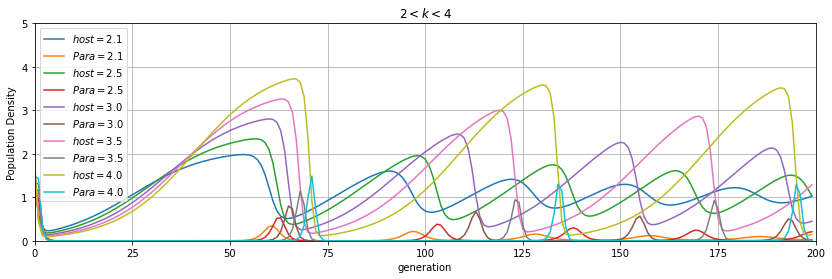

In [48]:
fig = plt.figure(figsize=(14, 4))

    
ax = plt.subplot(1, 1, 1)
k_vec = (2.1,2.5,3.0, 3.5 , 4.0) # studying random values for k between 2 and 4
r = 0.1

for k in k_vec:
    host,para = mod_nicolson_bailey(k,r)
    ax.plot(host, label = f"$host = {k:.1f}$")
    ax.plot(para, label = f"$Para = {k:.1f}$")
        #f"$x_0 = {x0*100:.1f}\%$"
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_xlim([0,200])
ax.set_ylim([0, 5])
ax.set_title(f"$2<k<4$")
ax.legend()
ax.grid()

print("figure (ix)")

Looking at these curves, we can observe similar behaviour as observed in case (e). We observe that the number of oscillations and the amplitude of these oscillations increase as we increase the value of $k$. Which is agreement with the theory. As we increase the carrying capacity of the envrionment, more organisms, or a higher population density can be sustained.

We also see that the population density of the host and parasiotid are osciallting perpetually. Essentially in these curves, we observe sustained cycles, which is a form of coexistence. {**2**} We can see that neither host or parasitoid population ever go extinct. They flourish and decline in cycles over generations.



### g) $k$ > 4.5

parasitoid population density at generation 25 =  0.0
figure (x)


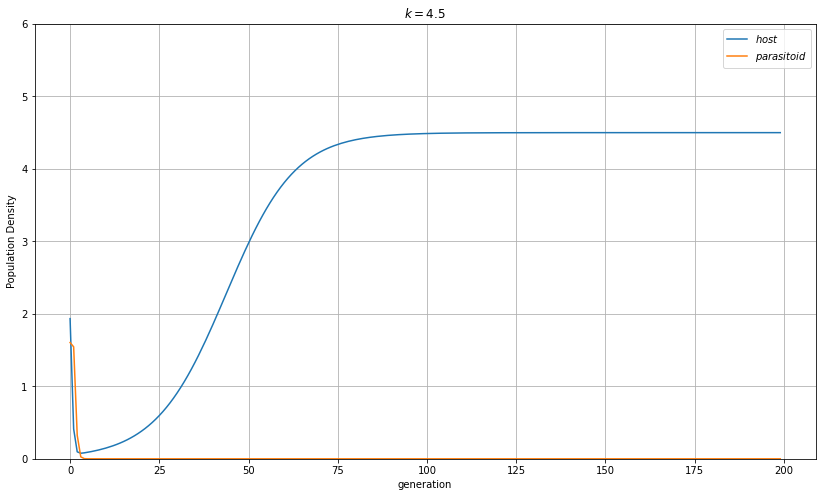

In [51]:
fig = plt.figure(figsize=(14, 8))

ax = plt.subplot(1, 1, 1)
k = 4.5
r = 0.1
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")

ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 6])
ax.set_title(f"$k = 4.5$")
ax.legend()
ax.grid()

print(f"parasitoid population density at generation 25 =  {para[25]}")


print("figure (x)")

For the carrying capacity being set to values greater than 4.5, we observe a very unique case. 

We can see that the parasitoid population goes extinct extremley early on, followed by an exponential growht in the host population density. The host population density peaks around the carrying capacity value ($k$) where it stabilizes for future generations. 

This behaviour can be observed for all values of $k$ greater than 4.5. 



## Discussion

### Summary of Results 

#### Varying r | $k = 2.0$ 
##### Case (a) and case (b) ~ $0.1<r<1.0$ and $1.0<r<3.3$

Number of oscillations decreased. The system was able to acheive stability within fewer and fewer generations. Though in this period, as $r$ is increasing the amplitude of the oscillations increased, but never crossing the carrying capacity ($k$).

##### case (c)  ~ $3.4<r<5.5$ 

We see an emeregence of chaos in this range of $r$. In this case, it is important to note that the intrinsic growth rate of the host is increasing by a factor of $e^r$ every generation. This means that the host population itself is rising  past the carrying capacity of the environment.

Hence, intially, we can see that there is a parasitoid and host population. But in future generations, we can see that the parasitoid population has gone extinct. The host population shows chaotic cycles, of population explosions followed immediately by crashes.

##### case (d)  ~ $r>5.5$ 
This case is an extension of case (c). Once the $r$ value is greater than 5.5, we can only see population explosions and population crashes. There are a few to no cycles of population explosions and crashes as $r$ increases past 5.5.
***
#### Varying k | $r = 0.1$ 
##### case (e) ~ $1<k <2$
In this case, it is observed that as $k$ increases, the number of oscillations and the amplitude of the oscialltions increase as well. This is made possible by the increasing carrying capacity of the environment.

However, from the graphs it is clear that these systems are reaching equilibirum, ie the cycles do not go on perpetually. The lower the $k$ the faster the system reaches equilibrium. 


#### case (f) ~ $2<k <4$

This case is an extension of case (e). We can see that the cycles carry on perpetually, and never seem to ever reach equilibrium. 


#### case (g) ~ $k>4.5$
We observe an initial plummet in the host and parasitoid population. The parasitoid is unable to recover and goes extinct, which allows the host population to grow and reach the maximum carrying capacity of the envrionment.

***

### Are there any distinctive graph types? 


##### Sustained Cycles (A form of coexistence) 

figure (xi)


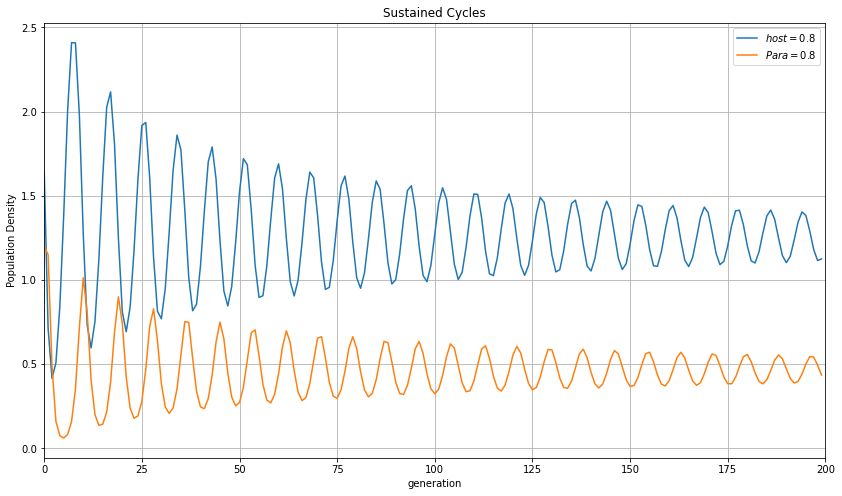

In [52]:

fig = plt.figure(figsize=(14, 8))

# sustained cycles (figure a)
ax = plt.subplot(1, 1, 1) 
k = 3.0
r_vec = [0.8]

for r in r_vec:
    host,para = mod_nicolson_bailey(k,r)
    ax.plot(host, label = f"$host = {r:.1f}$")
    ax.plot(para, label = f"$Para = {r:.1f}$")
        #f"$x_0 = {x0*100:.1f}\%$"
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_xlim([0,200])
ax.set_title(f"Sustained Cycles")
ax.legend()
ax.grid()

print("figure (xi)")

Attached above, we can see that the host population and the parasitoid population are always oscillating, without showing any signs of reaching equilibrium. (Hypotheisised condition). 

This behaviour is observed in **case~f**.

##### Dampened Oscillation to coexisctence

Print figure (xii)


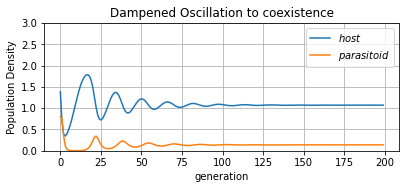

In [53]:
fig = plt.figure(figsize=(14, 8))

# dampened oscillation to coexistence
ax = plt.subplot(3, 2, 2)
k = 2.0
r = 0.3
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 3])
ax.set_title(f"Dampened Oscillation to coexistence")
ax.legend()
ax.grid()

print("Print figure (xii)")

In this graph we can observe that as the geneartions progress, the amplitude of the oscilltions (cycles) diminish. And after a certain point we observe just a flat line in both host and parasitoid population. Both organisms are coexisting at this point in the environment and have reached equilibrium. 


This behaviour is observed in the following ***cases ~ a, b, e.***

##### Parasitoid extinction to host persistance 

figure (xiii)


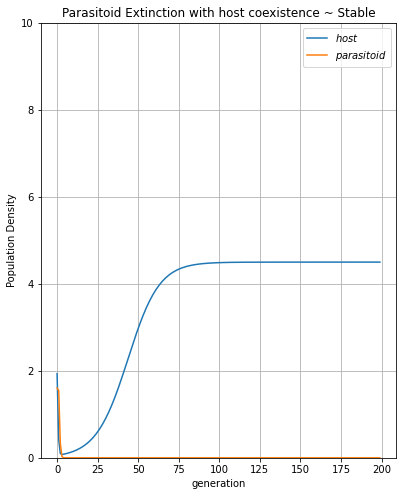

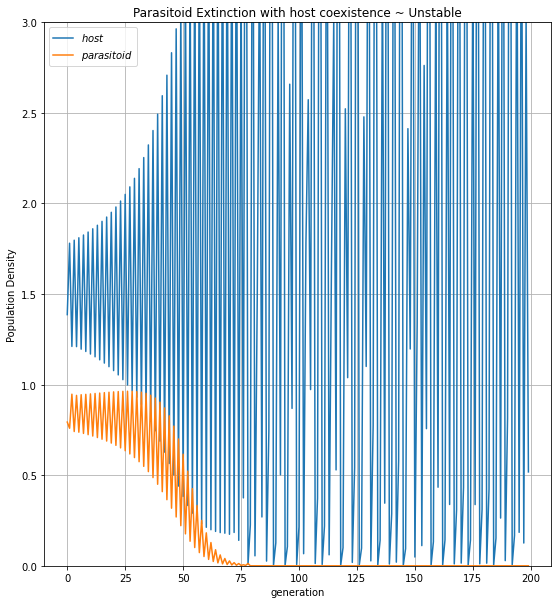

In [54]:
fig = plt.figure(figsize=(14, 8))

# figure (c)
ax = plt.subplot(1, 2, 1)
k = 4.5
r = 0.1
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")

ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 10])
ax.set_title(f"Parasitoid Extinction with host coexistence ~ Stable")
ax.legend()
ax.grid()


## figure (d)
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(1, 2, 2)
k = 2.0
r = 3.4
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")
        
ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 3])
ax.set_title(f"Parasitoid Extinction with host coexistence ~ Unstable")
ax.legend()
ax.grid()

print("figure (xiii)")

There are two types of conditions where we see this behaviour, stable and unstable.

In stable, we can see that the host population reaches equilibrium at the carrying capacity, depicted by a flat line.

This behaviour is observed in **case~ g**

In unstable, is characterised by rapid explosions and crashes of host population once the parasitoid population has gone extinct.

This behaviour is observed in **case ~ c**


#### Special Cases 
ie these cases weren't too clearly observed in the "Results" section. They occur for certain initial conditions and have been listed out below. 

##### Coexistence with aperiodic dynamics

figure xiv


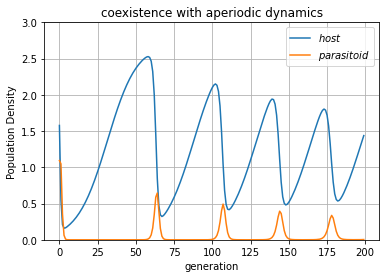

In [55]:
##coexistence with aperiodic dynamics (figure e)

ax = plt.subplot(1, 1, 1)
k = 2.7
r = 0.1
host,para = mod_nicolson_bailey(k, r)
ax.plot(host, label = f"$host$")
ax.plot(para, label = f"$parasitoid$")

ax.set_xlabel(r"generation")
ax.set_ylabel(r"Population Density")
ax.set_ylim([0, 3])
ax.set_title(f"coexistence with aperiodic dynamics")
ax.legend()
ax.grid()

print("figure xiv")

We observe that the parasitoid population is presnet in the system not in all the generations, but it is not extinct either. We see the population levels rise aperiodically.

##### Note 
The literautre cites a second special case "alternative stable states". However it was a case I was unable to plot in this study.


### Conclusion 

While the behaviour I hypothesised did occur (sustained cycles), there were multiple other distinct graph types that were observed in this analysis of the Density-Dependent Nicholson Bailey model. We were able to observe 4 distinct cases related to the NBM, previously identified in scientific literature. 





# Bibliography



1. Bonhoeffer, S. (n.d.). Unstable oscillations and spatial structure: The Nicholson-Bailey model. RetrievedFebruary 24, 2022, from https://ethz.ch/content/dam/ethz/special interest/usys/ibz/theoreticalbiology/education/learningmaterials/701-1424-00L/nbmodel.pdf 

2. Host-parasitoid interactions - ecology courses. (n.d.). Retrieved February 24, 2022, from http://courses.ecology.uga.edu/ecol4000-fall2018/wp-content/uploads/sites/22/2018/09/host-parasitoid.pdf 




3. Duke, N. (n.d.). Population Dynamics. ecology RSS2. Retrieved February 24, 2022, from https://sites.nicholas.duke.edu/ecologyapp/modules/population-dynamics/#:~:text=The%20intrinsic%20growth%20rate%20is,of%20a%20population%20per%20individual. 



